In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

pd.options.mode.chained_assignment = None  # default='warn'

data_key = pd.read_csv('key.csv')
data_key = data_key[data_key['station_nbr'] != 5]
data_weather = pd.read_csv('weather.csv')
data_weather = data_weather[data_weather['station_nbr'] != 5] ## Station 5번 제거한 나머지
data_train = pd.read_csv('train.csv')

df = pd.merge(data_weather, data_key)
station_nbr = df['station_nbr']
df.drop('station_nbr', axis=1, inplace=True)
df['station_nbr'] = station_nbr
df = pd.merge(df, data_train)
# Station 5번을 뺀 나머지 Merge 완성
# 'M'과 '-'을 np.nan으로 값을 변경하기 전에, '  T'값을 먼저 snowfall=0.05, preciptotal = 0.005로 변경하자 
df['snowfall'][df['snowfall'] == '  T'] = 0.05
df['preciptotal'][df['preciptotal'] == '  T'] = 0.005
df['snowfall'][df['snowfall'] == '  T'], df['preciptotal'][df['preciptotal'] == '  T']
# T 값 변경 완료. 이제, 19개 Station 별로 정리하기 (5번 Station 생략)
df['snowfall'][df['snowfall'] == '  T'] = 0.05
df['preciptotal'][df['preciptotal'] == '  T'] = 0.005
# T 값 변경 완료. 이제, 19개 Station 별로 정리하기 (5번 Station 생략)
df_s_1 = df[df['station_nbr'] == 1]; df_s_8 = df[df['station_nbr'] == 8]; df_s_15 = df[df['station_nbr'] == 15]
df_s_2 = df[df['station_nbr'] == 2]; df_s_9 = df[df['station_nbr'] == 9]; df_s_16 = df[df['station_nbr'] == 16]
df_s_3 = df[df['station_nbr'] == 3]; df_s_10 = df[df['station_nbr'] == 10]; df_s_17 = df[df['station_nbr'] == 17]
df_s_4 = df[df['station_nbr'] == 4]; df_s_11 = df[df['station_nbr'] == 11]; df_s_18 = df[df['station_nbr'] == 18]
df_s_5 = df[df['station_nbr'] == 5]; df_s_12 = df[df['station_nbr'] == 12]; df_s_19 = df[df['station_nbr'] == 19]
df_s_6 = df[df['station_nbr'] == 6]; df_s_13 = df[df['station_nbr'] == 13]; df_s_20 = df[df['station_nbr'] == 20]
df_s_7 = df[df['station_nbr'] == 7]; df_s_14 = df[df['station_nbr'] == 14]

In [2]:
#station 16
cols16 = df_s_16.columns.drop(['date', 'codesum'])
df_s_16[cols16] = df_s_16[cols16].apply(pd.to_numeric, errors='coerce')

df_s_16['tmax'][df_s_16['tmax'].isnull()] = df_s_16['tmax'].mean()
df_s_16['tmin'][df_s_16['tmin'].isnull()] = df_s_16['tmax'].mean()
df_s_16['tavg'][df_s_16['tavg'].isnull()] = df_s_16['tavg'].mean()
df_s_16['depart'][df_s_16['depart'].isnull()] = df_s_16['depart'].mean()
df_s_16['dewpoint'][df_s_16['dewpoint'].isnull()] = df_s_16['dewpoint'].mean()
df_s_16['wetbulb'][df_s_16['wetbulb'].isnull()] = df_s_16['wetbulb'].mean()
df_s_16['heat'][df_s_16['heat'].isnull()] = df_s_16['heat'].mean()
df_s_16['cool'][df_s_16['cool'].isnull()] = df_s_16['cool'].mean()
df_s_16['sunrise'][df_s_16['sunrise'].isnull()] = df_s_16['sunrise'].mean()
df_s_16['sunset'][df_s_16['sunset'].isnull()] = df_s_16['sunset'].mean()
df_s_16['snowfall'][df_s_16['snowfall'].isnull()] = df_s_16['snowfall'].mean()
df_s_16['preciptotal'][df_s_16['preciptotal'].isnull()] = df_s_16['preciptotal'].mean()
df_s_16['stnpressure'][df_s_16['stnpressure'].isnull()] = df_s_16['stnpressure'].mean()
df_s_16['sealevel'][df_s_16['sealevel'].isnull()] = df_s_16['sealevel'].mean()
df_s_16['resultspeed'][df_s_16['resultspeed'].isnull()] = df_s_16['resultspeed'].mean()
df_s_16['resultdir'][df_s_16['resultdir'].isnull()] = df_s_16['resultdir'].mean()
df_s_16['avgspeed'][df_s_16['avgspeed'].isnull()] = df_s_16['avgspeed'].mean()

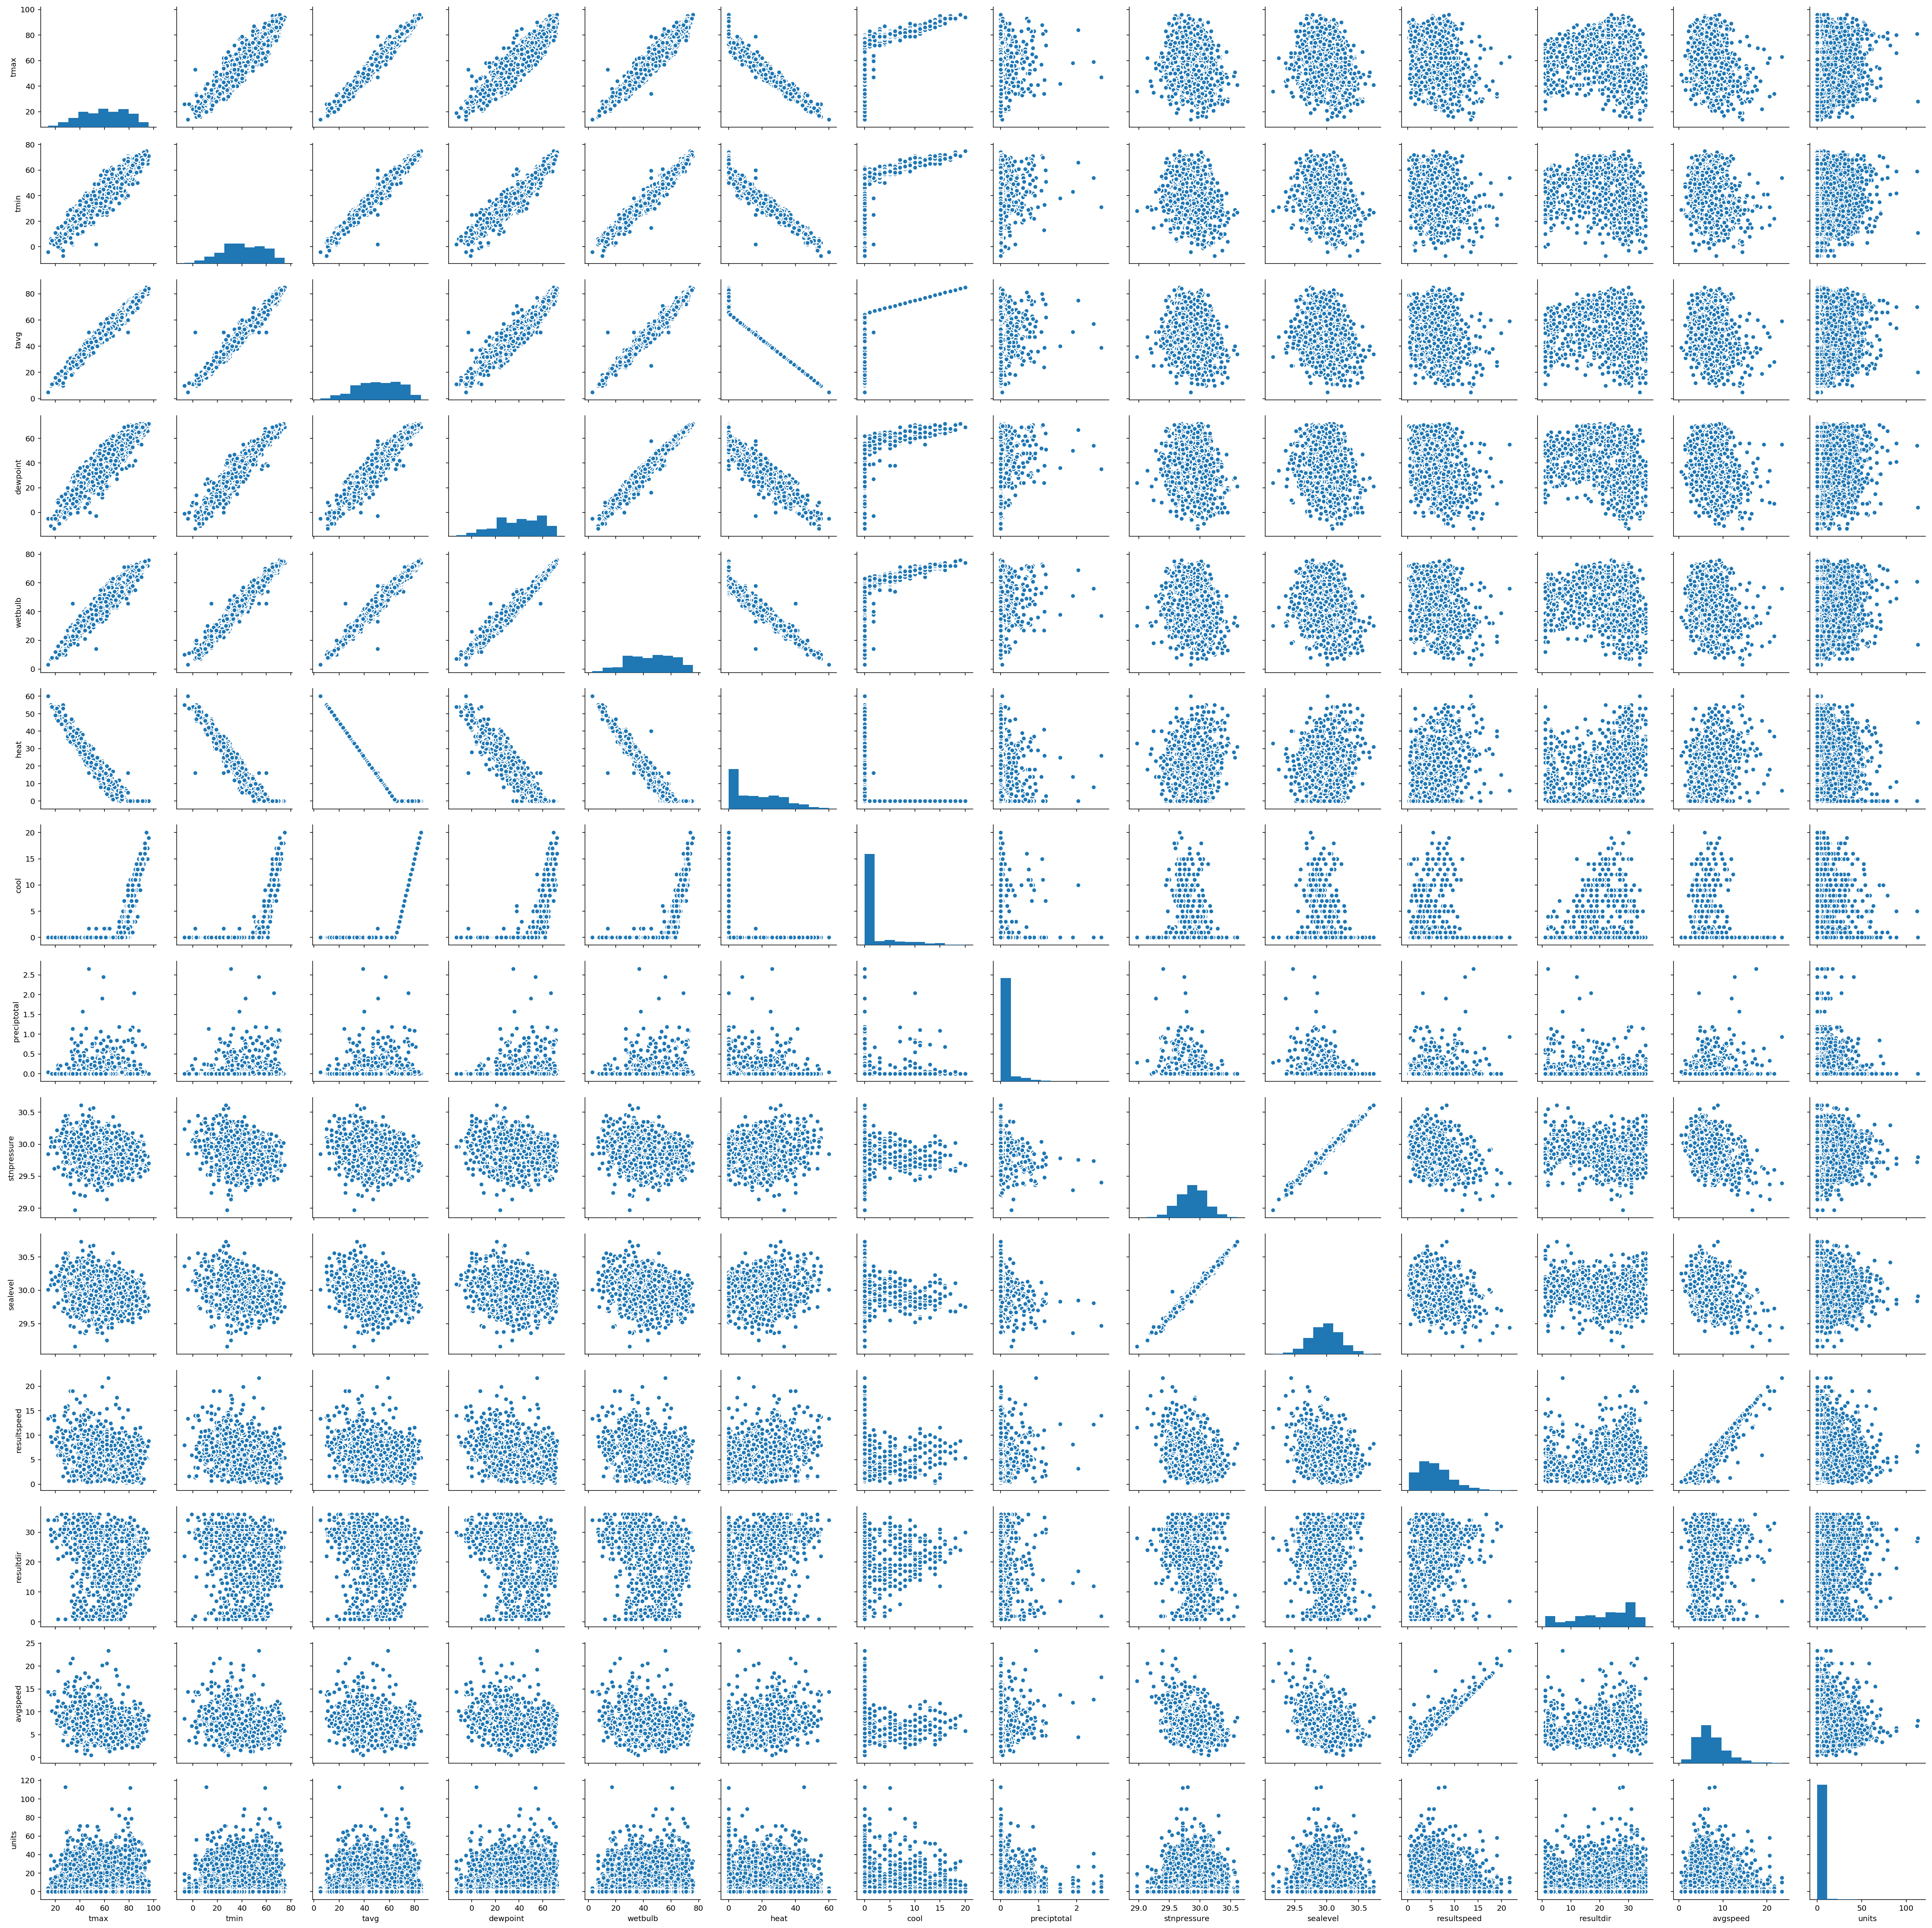

In [3]:
df16_col = df_s_16.columns.drop(['date', 'depart', 'sunrise', 'sunset', 'snowfall', 'store_nbr', 'station_nbr', 'item_nbr'])
sns.pairplot(df_s_16[df16_col])
plt.show()